**Genetic Algoritn Implementation :**
<br> Select two Mutually Exclusive and Exhaustive Subsets from [1,2,3....9,10]
Such that <br> sum of all elements of one subsest = 36 &
multiplication of all elements of other subset = 360.

In [57]:
# Import Modules
import numpy as np
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
import random

In [58]:
# Objective Function
def obj(chromosome):
    sum = 0
    multi = 1
    for i in range(1, len(chromosome)+1):
        if chromosome[i-1] == 1:
            sum = sum + i
        else:
            multi = multi * i

    return -(abs((36 - sum)) + abs((360 - multi)) + 1)


In [59]:
# Scores
def scores(list):
    return [obj(i) for i in list]


In [60]:
# Decode Chromosome
def decode(chromosome):
    sum = list()
    multi = list()
    for i in range(1, len(chromosome)+1):
        if chromosome[i-1] == 1:
            sum.append(i)
        else:
            multi.append(i)
    return sum, multi


In [61]:
# Parameters
no_bits = 10
no_parent = 10


In [62]:
# Mating Pool by Roulette Selection
def pool(parent):
    p_roulette = [(obj(parent[i])/sum(scores(parent)))
                  for i in range(no_parent)]
    w = [(1/i) for i in p_roulette]
    c = random.choices(parent, weights=w, k=int(no_parent/2))
    return  c


In [63]:
# Reproducton
def crossover(parent1, parent2):
    child1, child2 = parent1.copy(), parent2.copy()
    if rand() < 0.8:
        cross_point = randint(2, 7)
        child1 = parent1[:cross_point] + parent2[cross_point:]
        child2 = parent2[:cross_point] + parent1[cross_point:]
    return [child1, child2]


In [64]:
# Mutation
def mutation(chromosome):
    for i in range(len(chromosome)):
        if rand() < 0.1:
            chromosome[i] = 1 - chromosome[i]


In [65]:
# Elitsm
def Elitsm(children, grand_parent):
    child_scores = [obj(i) for i in children]
    grand_parent_scores = [obj(i) for i in grand_parent]
    if max(child_scores) < min(grand_parent_scores):
        children[child_scores.index(max(
            child_scores))] = grand_parent[grand_parent_scores.index(min(grand_parent_scores))]
    return children


In [66]:
# select an item except a specific value
def choice_excluding(list, exception):
    possible_choices = [v for v in list if v != exception]
    return np.random.choice(possible_choices)


In [67]:
# Initial Population
grand_parent = [randint(0, 2, no_bits).tolist() for i in range(no_parent)]

# Set Iteration
iter = 5000

# Initialize lists for plot
GL = []
BSL = []
ASL = []
FSL = []


In [68]:
# Genetic Algorithm
def genetic_algorithm(grand_parent, iter):
    parent = grand_parent
    best_chromosome, best_score = 0, obj(parent[0])
    for gen in range(iter):
        BSL.append(max(scores(parent)))
        ASL.append(sum(scores(parent))/len(scores(parent)))
        GL.append(gen)
        for i in range(no_parent):
            if scores(parent)[i] > best_score:
                best_chromosome, best_score = parent[i], scores(parent)[i]
                print('New best at - generation', gen, '\n', 'chromosome -',
                      parent[i], '\t', 'score -', scores(parent)[i], '\n')
        fittest = pool(parent)
        FSL.append(sum(scores(fittest))/len(scores(fittest)))
        children = []
        for i in range(len(fittest)):
            not_i = choice_excluding(range(len(fittest)), i)
            parent1, parent2 = fittest[i], fittest[not_i]
            for j in crossover(parent1, parent2):
                mutation(j)
                children.append(j)
        Elitsm(children, grand_parent)
        parent = children
        if best_score == -1:
            break
    plt.plot(GL, BSL, color='green', label='Best score of a generation')
    plt.plot(GL, FSL, color='blue',
             label='Average Score of Fittest Chromosomes of a generation')
    plt.plot(GL, ASL, color='red', label='Average score of a Generation')
    plt.xlabel('Generation')
    plt.ylabel('Score')
    plt.xlim(gen-50,gen)
    plt.ylim(-20000,0)
    plt.legend()
    plt.show()
    return best_chromosome


New best at - generation 0 
 chromosome - [0, 1, 1, 1, 1, 0, 0, 1, 0, 1] 	 score - -23 

New best at - generation 7 
 chromosome - [1, 1, 1, 1, 1, 0, 0, 1, 0, 1] 	 score - -22 

New best at - generation 40 
 chromosome - [1, 0, 0, 1, 1, 1, 0, 1, 0, 1] 	 score - -21 

New best at - generation 109 
 chromosome - [1, 1, 1, 1, 0, 1, 0, 1, 1, 0] 	 score - -14 

New best at - generation 126 
 chromosome - [0, 1, 0, 0, 0, 0, 1, 1, 1, 1] 	 score - -1 



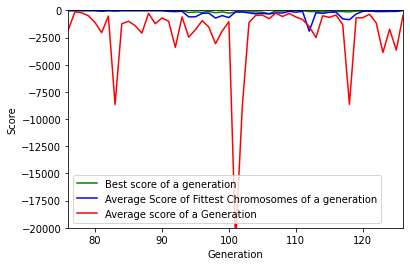

In [69]:
# Do the Magic
best_chromosome = genetic_algorithm(grand_parent, iter)


In [70]:
# Answer
print('List of numbers to add = ', decode(best_chromosome)[
      0], '\n', 'List of numbers to multiply = ', decode(best_chromosome)[1])
print('Summation = ', sum(decode(best_chromosome)[0]))

multi_best = 1
for i in (decode(best_chromosome)[1]):
    multi_best = multi_best * i
print('Multiplication = ', multi_best)


List of numbers to add =  [2, 7, 8, 9, 10] 
 List of numbers to multiply =  [1, 3, 4, 5, 6]
Summation =  36
Multiplication =  360
